# K-Means Clustering

In [1]:
# Importing libraries
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\Salaudeen Ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


### Getting the data and loading it into the pandas dataframe

In [3]:
df = pd.read_csv('shopify_data_seller2.csv')
df.head()

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,Dominica,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN
1,Homepage,Gabon,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
2,Unknown,Bosnia and Herzegovina,Unknown,Linux,2021-01-07 19:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
3,Homepage,Dominica,Unknown,Mac OS X,2021-06-27 09:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
4,Product,Saint Helena,l.instagram.com,Android,2020-11-14 10:00:00,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram


In [4]:
#Check the data type of each column
df.dtypes


page_type               object
location_country        object
referrer_host           object
ua_os                   object
hour                    object
total_orders_placed      int64
total_checkouts          int64
total_carts              int64
total_sessions           int64
total_pageviews          int64
total_conversion       float64
total_bounce_rate      float64
ua_form_factor          object
referrer_source         object
referrer_name           object
dtype: object

In [5]:
print(df.shape) #check number of columns and rows

(25000, 15)


### Descriptive and Exploratory Statistics
This understand the basic features of the data and obtain a short summary about the data. 


In [6]:
df.describe(include='all')

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
count,25000,25000,25000,25000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,10491,4972
unique,9,62,44,11,13114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,7
top,Homepage,Bosnia and Herzegovina,Unknown,Android,2019-08-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mobile,Unknown,Instagram
freq,15265,6688,14509,7022,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14105,3548,2388
mean,NaN,NaN,NaN,NaN,NaN,0.414480,0.623280,0.828200,2.039680,2.871880,0.059554,0.896619,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.095525,1.705321,2.275964,2.844466,5.208085,0.137343,0.272584,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


The above shows the total count of each column; the number of unique values from the column (for categorical columns), the mean value for numeric columns. 

In [7]:
df.describe()

,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.414480,0.623280,0.828200,2.039680,2.871880,0.059554,0.896619
std,1.095525,1.705321,2.275964,2.844466,5.208085,0.137343,0.272584
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,11.000000,19.000000,26.000000,29.000000,57.000000,0.857143,1.000000


## Value counts for the Categorical Columns


In [8]:
# Getting the Value count for user's device operating system
User_Value_counts = df['ua_os'].value_counts().to_frame()
User_Value_counts

,ua_os
Android,7022
iOS,6871
Linux,3798
Windows,3545
Mac OS X,2832
Other,543
Chrome OS,185
Fedora,126
Tizen,32
Windows Phone,27


In [9]:
# Getting the Value count for user's device type
user_device_type= df['ua_form_factor'].value_counts().to_frame()
user_device_type

,ua_form_factor
Mobile,14105
Desktop,10320
Other,575


In [10]:
# Getting the Value count for the type of referral
df_reffere_source= df['referrer_source'].value_counts().to_frame()
df_reffere_source

,referrer_source
Unknown,3548
Social,3280
Direct,1971
Search,1692


In [11]:
# Getting the Value count for referrer name
df_reffere_name= df['referrer_name'].value_counts().to_frame()
df_reffere_name

,referrer_name
Instagram,2388
Google,1551
Facebook,892
Yahoo!,43
Bing,42
Yandex,29
DuckDuckGo,27


In [12]:
# x=df['referrer_source']
# y = df['total_checkouts'] 
# plt.scatter(x,y)

Grouping referrer_source, with referrer_name to investigate which source brought in more customers

In [13]:
#Groupby function
df_test = df [['total_checkouts', 'referrer_source', 'referrer_name',]]

#summing the total check out from each source and name
df_grp = df_test.groupby(['referrer_source', 'referrer_name'], as_index = False).sum()

#sorting the largest to the smallest
df_grp.sort_values('total_checkouts', ascending=False)

,referrer_source,referrer_name,total_checkouts
5,Social,Facebook,1905
2,Search,Google,1473
6,Social,Instagram,846
0,Search,Bing,112
4,Search,Yandex,18
3,Search,Yahoo!,4
1,Search,DuckDuckGo,0


### Interpretation
This implies that Facebook brought in more customers than any of the social media channels, with
about 1905 total checkout. 

#### Recommendation
- Increase marketing resources on Facebook because Facebook users are the highest known customer source. An increase in the Facebook ads will leads to higher turnover.
- Hire more SEO to optimize the website with a focus on Google and Bing


In [34]:
df_pivot =df_grp.pivot(index ='referrer_name', columns ='referrer_source')
df_pivot

total_checkouts        
referrer_source          Search  Social
referrer_name                          
Bing                      112.0     NaN
DuckDuckGo                  0.0     NaN
Facebook                    NaN  1905.0
Google                   1473.0     NaN
Instagram                   NaN   846.0
Yahoo!                      4.0     NaN
Yandex                     18.0     NaN

In [16]:
#Groupby function by user device
df_test2 = df [['total_checkouts', 'referrer_source', 'referrer_name', 'ua_form_factor']]

df_grp2 = df_test2.groupby(['referrer_source', 'referrer_name','ua_form_factor'], as_index = False).sum()

#sorting the largest to the smallest
df_grp2.sort_values('total_checkouts', ascending=False)

,referrer_source,referrer_name,ua_form_factor,total_checkouts
16,Social,Facebook,Mobile,1549
7,Search,Google,Mobile,1210
19,Social,Instagram,Mobile,720
15,Social,Facebook,Desktop,208
8,Search,Google,Other,205
17,Social,Facebook,Other,148
20,Social,Instagram,Other,114
1,Search,Bing,Mobile,85
6,Search,Google,Desktop,58
2,Search,Bing,Other,17


### Interpretation
Advertisments on Facebook social media leads to more churn than any other media or search engine. More ads need to be target towards mobile social media.


In [36]:
df_pivot2 =df_grp2.pivot(index ='ua_form_factor', columns ='referrer_source')
df_pivot2

total_checkouts                      
referrer_source          Direct Search Social Unknown
ua_form_factor                                       
Desktop                       8     68    220     287
Mobile                      101   1312   2269    3055
Other                        42    227    262     372

## Visualization 

<AxesSubplot:xlabel='referrer_source', ylabel='total_checkouts'>

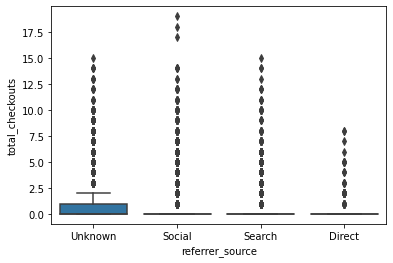

In [17]:
import seaborn as sns
sns.boxplot(x='referrer_source', y ='total_checkouts', data =df)

Social media has more outliers than any other refferer source. The customers from this source can be classified as agressive buyers and with countinous advertisement
this behavior can lead to higher returns for the company. 

Checking the relationship between the Features


(0.0, 19.95)

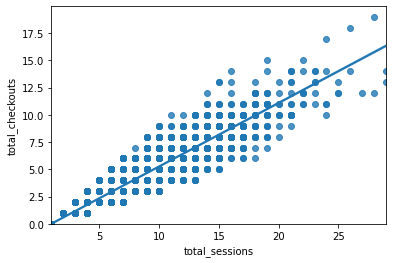

In [18]:
sns.regplot(x='total_sessions', y = 'total_checkouts', data=df)
plt.ylim(0,)

There is a strong correlation between the total session of a user and the total checkout. i.e. the more time spent on website the higher the chance of checking out an order. 
- Improving the landing page and making it more user friendly can boost this to yield more revenue. 

(0.0, 19.95)

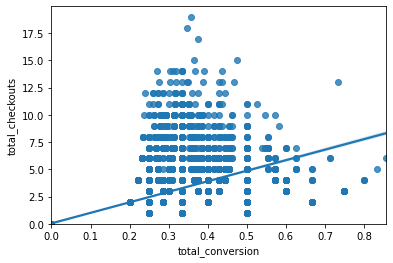

In [20]:
sns.regplot(x='total_conversion', y = 'total_checkouts', data=df)
plt.ylim(0,)

There is a week correlation between the total conversion and total checkout. No need for further investigation.

(0.0, 19.95)

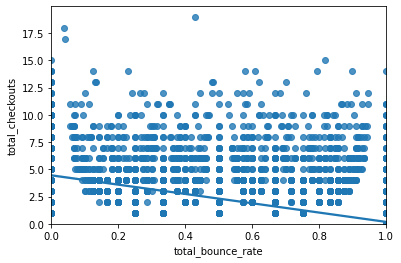

In [21]:
sns.regplot(x='total_bounce_rate', y = 'total_checkouts', data=df)
plt.ylim(0,)

There is a week correlation between the total conversion and total checkout. No need for further investigation.

(0.0, 19.95)

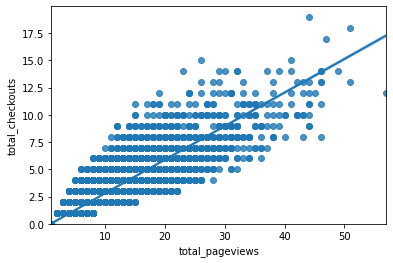

In [23]:
sns.regplot(x='total_pageviews', y = 'total_checkouts', data=df)
plt.ylim(0,)

There is a strong relationship between the total pageviews and total checkout.

In [24]:
df.dtypes

page_type               object
location_country        object
referrer_host           object
ua_os                   object
hour                    object
total_orders_placed      int64
total_checkouts          int64
total_carts              int64
total_sessions           int64
total_pageviews          int64
total_conversion       float64
total_bounce_rate      float64
ua_form_factor          object
referrer_source         object
referrer_name           object
dtype: object

### Preprocessing for Clustering

As you can see, **Location_Country**, **referre_host**, **ua_os** in this dataset are a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.


In [25]:
df = df.drop('location_country', axis =1)
df.head()

,page_type,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN
1,Homepage,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
2,Unknown,Unknown,Linux,2021-01-07 19:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
3,Homepage,Unknown,Mac OS X,2021-06-27 09:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
4,Product,l.instagram.com,Android,2020-11-14 10:00:00,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram


In [28]:
df = df.drop('referrer_host',axis =1)
df.head()

,page_type,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN
1,Homepage,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
2,Unknown,Linux,2021-01-07 19:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
3,Homepage,Mac OS X,2021-06-27 09:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
4,Product,Android,2020-11-14 10:00:00,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram


In [29]:
df=df.drop('ua_os', axis =1)
df =df.drop('hour', axis =1)

In [30]:
df.head()

,page_type,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN
1,Homepage,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
2,Unknown,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
3,Homepage,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
4,Product,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram


In [37]:
df.shape

(25000, 14)

In [34]:
# Endocing the Variables
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["page_type_code"] = ord_enc.fit_transform(df[["page_type"]])
df[["page_type", "page_type_code"]].head(11)

,page_type,page_type_code
0,Homepage,4.0
1,Homepage,4.0
2,Unknown,8.0
3,Homepage,4.0
4,Product,6.0
5,Homepage,4.0
6,Product,6.0
7,Homepage,4.0
8,Homepage,4.0
9,Homepage,4.0


In [41]:
df.dropna(subset = ["referrer_source"], inplace=True)

In [43]:
df.dropna(subset = ["referrer_name"], inplace=True)

In [46]:
df.shape

(4972, 16)

In [48]:

#Encoding ua_form_factor
df["ua_form_factor_code"] = ord_enc.fit_transform(df[["ua_form_factor"]])

#referrer_source
df["referrer_source_code"] = ord_enc.fit_transform(df[["referrer_source"]])

#referrer_name
df["referrer_name_code"] = ord_enc.fit_transform(df[["referrer_name"]])

In [49]:
df.head()

,level_0,index,page_type,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name,page_type_code,ua_form_factor_code,referrer_source_code,referrer_name_code
1,4,4,Product,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram,6.0,1.0,1.0,4.0
2,5,5,Homepage,0,0,0,1,1,0.000000,1.0,Mobile,Search,Google,4.0,1.0,0.0,3.0
3,6,6,Product,0,0,0,1,1,0.000000,1.0,Mobile,Social,Instagram,6.0,1.0,1.0,4.0
4,7,7,Homepage,0,0,0,1,1,0.000000,1.0,Mobile,Search,Google,4.0,1.0,0.0,3.0
8,15,15,Homepage,0,0,0,1,1,0.000000,1.0,Mobile,Search,Yandex,4.0,1.0,0.0,6.0


In [50]:
df.columns

Index(['level_0', 'index', 'page_type', 'total_orders_placed',
       'total_checkouts', 'total_carts', 'total_sessions', 'total_pageviews',
       'total_conversion', 'total_bounce_rate', 'ua_form_factor',
       'referrer_source', 'referrer_name', 'page_type_code',
       'ua_form_factor_code', 'referrer_source_code', 'referrer_name_code'],
      dtype='object')

In [51]:
df2 = df[[ 'total_orders_placed',
       'total_checkouts', 'total_carts', 'total_sessions', 'total_pageviews',
       'total_conversion', 'total_bounce_rate', 'page_type_code',
       'ua_form_factor_code', 'referrer_source_code', 'referrer_name_code']]
df2.head()

,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,page_type_code,ua_form_factor_code,referrer_source_code,referrer_name_code
1,2,3,4,7,14,0.285714,0.0,6.0,1.0,1.0,4.0
2,0,0,0,1,1,0.000000,1.0,4.0,1.0,0.0,3.0
3,0,0,0,1,1,0.000000,1.0,6.0,1.0,1.0,4.0
4,0,0,0,1,1,0.000000,1.0,4.0,1.0,0.0,3.0
8,0,0,0,1,1,0.000000,1.0,4.0,1.0,0.0,6.0


In [52]:
from sklearn.preprocessing import StandardScaler

X = df2.values[:, 1:]
X = np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[ 1.02628332,  1.02192605,  1.31876303, ...,  0.72436301,
         0.71822953,  0.80629521],
       [-0.42361647, -0.41990605, -0.42231233, ...,  0.72436301,
        -1.39231257, -0.34469526],
       [-0.42361647, -0.41990605, -0.42231233, ...,  0.72436301,
         0.71822953,  0.80629521],
       ...,
       [-0.42361647, -0.41990605, -0.42231233, ..., -1.15339136,
         0.71822953,  0.80629521],
       [-0.42361647, -0.41990605, -0.42231233, ..., -1.15339136,
        -1.39231257, -0.34469526],
       [-0.42361647, -0.41990605, -0.42231233, ...,  0.72436301,
        -1.39231257, -0.34469526]])

## Modeling

The k-means algorithm will clasify the customer type to have to have a clearer 
picture of which source pulls in more customers.

Let's apply k-means on our dataset, and take a look at cluster labels.

In [53]:
clusterNum = 4 #selected four because we have four referrer source
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 0 ... 0 0 0]


## Insight

We assign the labels to each row in the dataframe

In [55]:
df2['Clust_km'] = labels
df2.head(5)

<ipython-input-55-2b23b491ee0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Clust_km'] = labels


,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,page_type_code,ua_form_factor_code,referrer_source_code,referrer_name_code,Clust_km
1,2,3,4,7,14,0.285714,0.0,6.0,1.0,1.0,4.0,1
2,0,0,0,1,1,0.000000,1.0,4.0,1.0,0.0,3.0,0
3,0,0,0,1,1,0.000000,1.0,6.0,1.0,1.0,4.0,0
4,0,0,0,1,1,0.000000,1.0,4.0,1.0,0.0,3.0,0
8,0,0,0,1,1,0.000000,1.0,4.0,1.0,0.0,6.0,0


We can easily check the centroid values by averaging the features in each cluster.

In [57]:
df2.groupby('Clust_km').mean()

,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,page_type_code,ua_form_factor_code,referrer_source_code,referrer_name_code
Clust_km,,,,,,,,,,,
0,0.027488,0.032578,0.039196,1.044795,1.066684,0.010796,0.991686,4.315602,0.512599,0.666582,3.422499
1,3.548287,5.342679,7.130841,10.012461,17.345794,0.360709,0.319649,5.121495,1.059190,0.535826,2.750779
2,1.675283,2.447496,3.201939,4.983845,7.928918,0.338320,0.418485,4.751212,0.936995,0.668821,2.982229
3,6.145631,9.708738,13.271845,17.514563,33.300971,0.360191,0.197241,5.611650,1.165049,0.728155,2.223301


In [64]:
area = np.pi * ( X[:, 3])**2  
plt.scatter(X[:, 3], X[:, 10], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


IndexError: index 10 is out of bounds for axis 1 with size 10

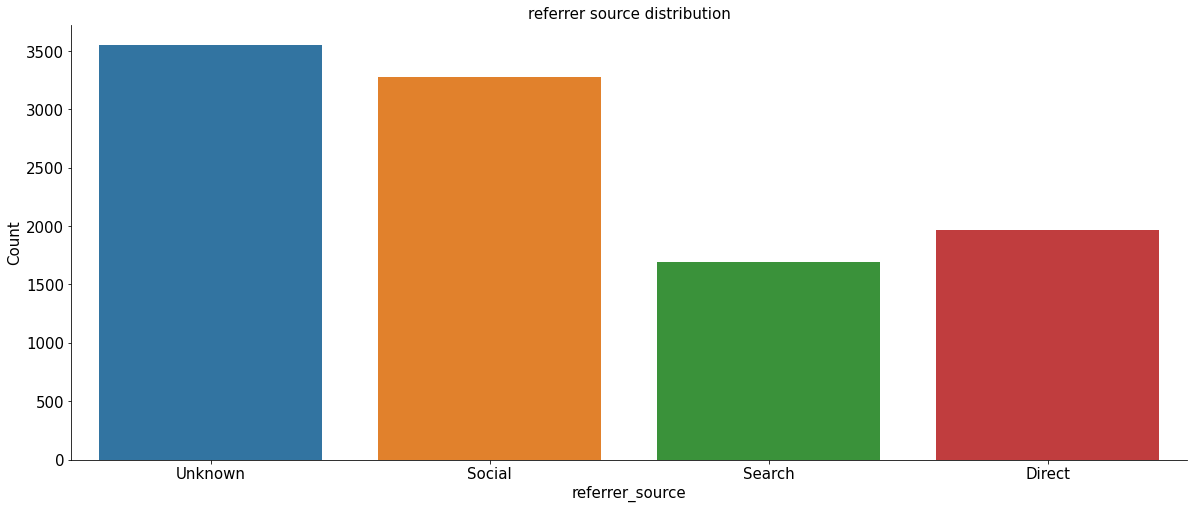

In [110]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'referrer_source', data = df)
ax.set_xlabel('referrer_source', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('referrer source distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [103]:
X= df[[
       'total_orders_placed', 'total_carts',
       'total_sessions', 'total_pageviews', 'total_conversion',
       'total_bounce_rate', 'ua_form_factor', 'referrer_source',
       'referrer_name']].values
X[0:5]

array([[0, 0, 1, 1, 0.0, 1.0, 'Desktop', 'Unknown', nan],
       [0, 0, 1, 1, 0.0, 1.0, 'Mobile', nan, nan],
       [0, 0, 1, 1, 0.0, 1.0, 'Desktop', nan, nan],
       [0, 0, 1, 1, 0.0, 1.0, 'Desktop', nan, nan],
       [2, 4, 7, 14, 0.2857142857142857, 0.0, 'Mobile', 'Social',
        'Instagram']], dtype=object)

In [104]:
y = df['total_checkouts'].values
y[0:5]

array([0, 0, 0, 0, 3], dtype=int64)

In [105]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

ValueError: could not convert string to float: 'Desktop'